In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/ayan1/OneDrive/Documents/Course/Machine Learning Using Python/Data Folder/diabetes.csv",header=0)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


ValueError: num must be an integer with 1 <= num <= 8, not 9

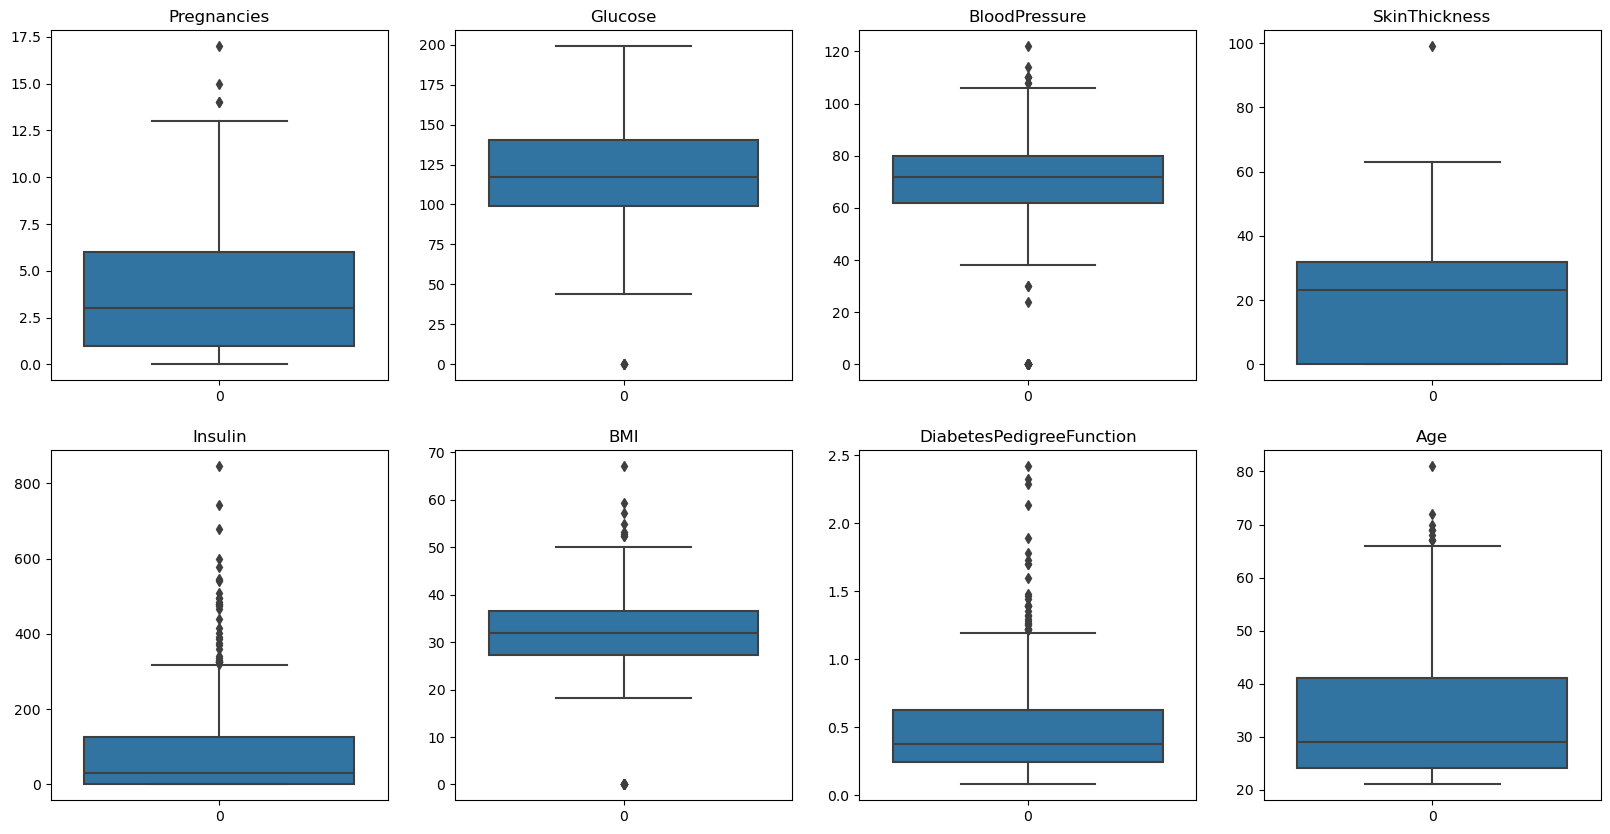

In [18]:
plt.figure(figsize=(20,10))
for i,column in enumerate(df.columns,1):
    plt.subplot(2,4,i)
    sns.boxplot(data=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

ValueError: num must be an integer with 1 <= num <= 8, not 9

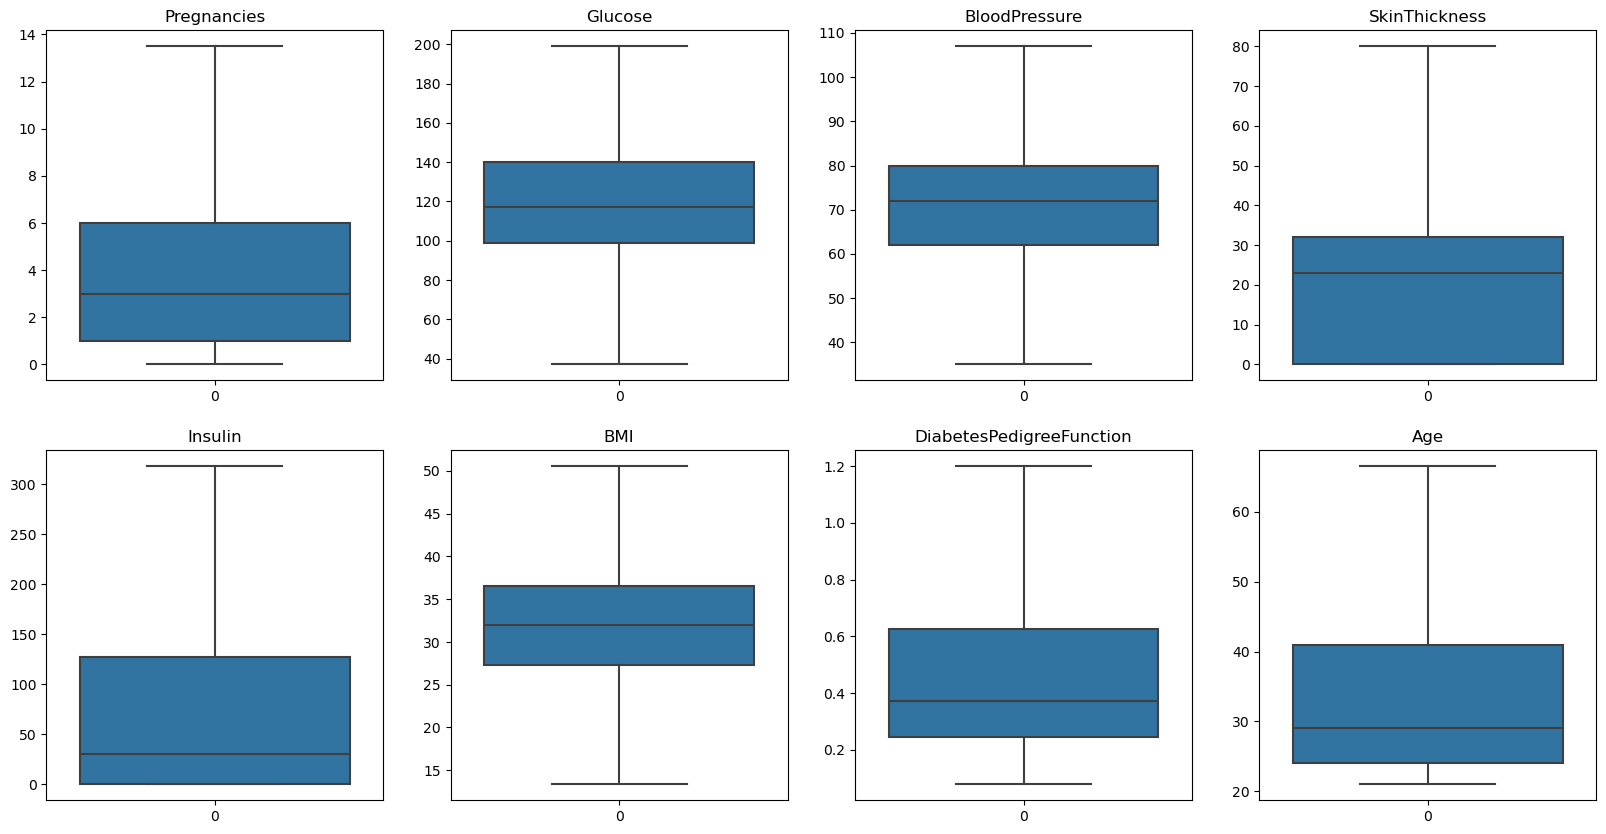

In [20]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)
outliers_indices = df[outliers].index

outliers_count = outliers.sum()
outliers_count
df_filtered = df.copy()
df = df_filtered

for feature in Q1.index:
    LB = Q1[feature] - 1.5 * IQR[feature]
    UB = Q3[feature] + 1.5 * IQR[feature]
    df_filtered[feature] = df_filtered[feature].clip(lower=LB, upper=UB)

plt.figure(figsize=(20,10))
for i,column in enumerate(df_filtered.columns,1):
    plt.subplot(2,4,i)
    sns.boxplot(data=df_filtered[column])
    plt.title(column)
plt.tight_layout()
plt.show()

Train a simple logistic model in python using glucose as an independent variable using both statsmodel and sklearn libraries.

In [22]:
import statsmodels.api as sn
from sklearn.linear_model import LinearRegression

x = df[['Glucose']].astype(float)
x_c = sn.add_constant(x)
y = df['Outcome']

lm_model_1 = sn.OLS(y,x_c).fit()

lm_model_2 = LinearRegression()
lm_model_2.fit(x, y)

print(lm_model_1.summary())
print("lm_model_2:\n","Intercept:\n",lm_model_2.intercept_,"\nCoefficient:\n",lm_model_2.coef_[0])

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     228.3
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           2.46e-45
Time:                        17:11:21   Log-Likelihood:                -420.50
No. Observations:                 768   AIC:                             845.0
Df Residuals:                     766   BIC:                             854.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5387      0.061     -8.880      0.0

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score


x_multi = df.drop('Outcome',axis=1)
y_multi = df['Outcome']

logit_model = LogisticRegression(max_iter=1000)
logit_model.fit(x_multi, y_multi)
y_pred = logit_model.predict(x_multi)

print("Confusion Matrx:\n", confusion_matrix(y_multi,y_pred))

print('Precision Score is :',precision_score(y_multi,y_pred))
print('Reacall Score is :',recall_score(y_multi,y_pred))


Confusion Matrx:
 [[443  57]
 [115 153]]
Precision Score is : 0.7285714285714285
Reacall Score is : 0.5708955223880597


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [32]:
logit_model.coef_

array([[ 1.21779132e-01,  3.61823440e-02, -1.57006463e-02,
        -1.07023518e-03, -1.50481565e-03,  1.00234742e-01,
         1.10438057e+00,  1.54732041e-02]])

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(x_multi,y_multi)

y_pred = lda_model.predict(x_multi)

print("Confusion Matrx:\n", confusion_matrix(y_multi,y_pred))

Confusion Matrx:
 [[445  55]
 [116 152]]


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi, test_size=0.2, random_state=1)

scaler = StandardScaler().fit(x_train)
x_train_s = scaler.transform(x_train)
scaler = StandardScaler().fit(x_test)
x_test_s = scaler.transform(x_test)


knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train_s,y_train)


print("Confusion Matrix:")
print(confusion_matrix(y_test,knn_model.predict(x_test_s)))
print("Accuracy Score:")
print(accuracy_score(y_test,knn_model.predict(x_test_s)))


Confusion Matrix:
[[76 23]
 [29 26]]
Accuracy Score:
0.6623376623376623


In [31]:
from sklearn.metrics import classification_report

y_pred = knn_model.predict(x_test_s)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.75        99
           1       0.53      0.47      0.50        55

    accuracy                           0.66       154
   macro avg       0.63      0.62      0.62       154
weighted avg       0.65      0.66      0.66       154

